<a href="https://colab.research.google.com/github/SD2513/ai-assessment-1/blob/main/2407091_ShlokDhital_Assessment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**

In [10]:
# 3.1 Problem - 1:
# Data exploration and understanding

import pandas as pd

# Read dataset
whr = pd.read_csv('drive/MyDrive/AI/WHR-2024-5CS037.csv')
# Show first 10 columns
whr.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [11]:
# Print number of rows and colums
print("Number of rows:", whr.shape[0])
print("Number of columns:", whr.shape[1])
print("Shape:", whr.shape)

Number of rows: 143
Number of columns: 9
Shape: (143, 9)


In [12]:
# Print datatypes
whr.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [110]:
# Basic Statistics

whr["score"].agg(['mean','median','std'])

,score
mean,5.527580
median,5.785000
std,1.170717


In [14]:
# Find country with highest score

whr.loc[whr["score"]== whr["score"].max(),['Country name', 'score']]

,Country name,score
0,Finland,7.741


In [15]:
# Find country with lowest score

whr.loc[whr["score"]== whr["score"].min(),['Country name', 'score']]

,Country name,score
142,Afghanistan,1.721


In [16]:
# Find number of missing values in each column of dataset

whr.isna().sum()

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


In [17]:
import numpy as np

whr[whr.isnull().any(axis=1)]

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,Tajikistan,5.281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,State of Palestine,4.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Filter countries with scores greater than 7.5

highest_scores = whr.loc[whr["score"]>7.5]

In [19]:
# Sort dataset by GDP per Capita (Descending)

highest_score_srt_gdp = highest_scores.sort_values(by='Log GDP per capita', ascending=False)
highest_score_srt_gdp.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [20]:
# Add Happiness Category column

# Define categorize_happiness function
def categorize_happiness(score):
  if score < 4: return "Low"
  if score <= 6: return "Medium"
  return "High"

whr["Happiness_Category"] = whr["score"].apply(categorize_happiness)
# Show a sample to check if categorize working properly
whr.sample(n=10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875,Low
57,Thailand,5.976,1.484,1.347,0.620,0.756,0.283,0.024,1.463,Medium
114,Tunisia,4.422,1.306,0.955,0.579,0.254,0.024,0.018,1.285,Medium
51,South Korea,6.058,1.815,1.178,0.770,0.555,0.126,0.158,1.456,High
50,Japan,6.060,1.786,1.354,0.785,0.632,0.023,0.219,1.261,High
77,Colombia,5.695,1.437,1.241,0.648,0.644,0.072,0.059,1.596,Medium
63,Greece,5.934,1.684,1.276,0.696,0.337,0.018,0.093,1.830,Medium
71,Russia,5.785,1.642,1.351,0.531,0.551,0.138,0.121,1.451,Medium
47,Argentina,6.188,1.562,1.381,0.585,0.681,0.087,0.080,1.812,High
97,Turkiye,4.975,1.702,1.175,0.631,0.202,0.068,0.115,1.083,Medium


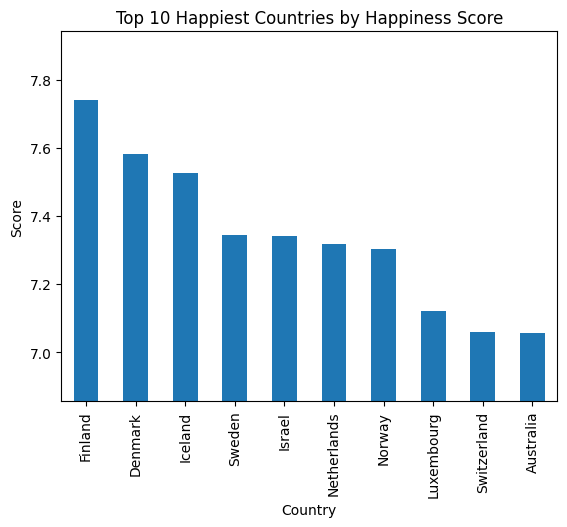

In [21]:
# 3.1 Problem - 1:
# Data Visualizations

import matplotlib.pyplot as plt

# Bar plot: Top 10 countries with highest scores
# Extract top 10 countries and plot into bar chart
top_10 = whr[['Country name', 'score']].sort_values(by='score', ascending=False).head(10)
top_10.plot(kind='bar', x='Country name', y='score', legend=None)
# Enter chart title and axis labels
plt.title('Top 10 Happiest Countries by Happiness Score')
plt.xlabel('Country')
plt.ylabel('Score')
# Y axis from lowest - 0.2 to highest + 0.2 so that difference in scores is seen
plt.ylim(bottom=top_10['score'].min()-0.2, top=top_10['score'].max()+0.2)
plt.show()

Text(0, 0.5, 'Score')

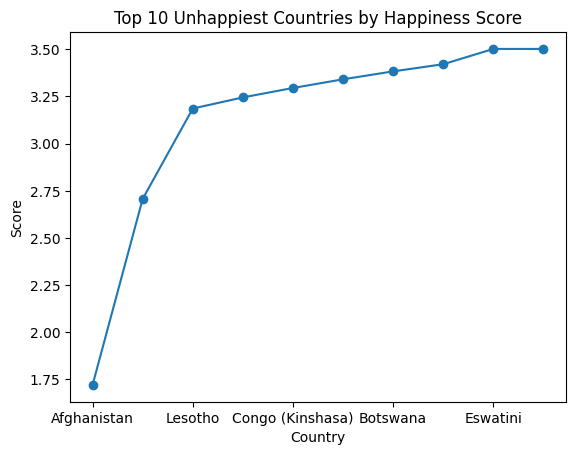

In [22]:
# Line plot: top 10 unhappiest countries by score

# Extract 10 unhappiest countries
bottom_10 = whr[['Country name', 'score']].sort_values(by='score').head(10)
bottom_10.plot(kind='line', x='Country name', y='score', marker='o', legend=None)
# Enter chart title and axis labels
plt.title('Top 10 Unhappiest Countries by Happiness Score')
plt.xlabel('Country')
plt.ylabel('Score')

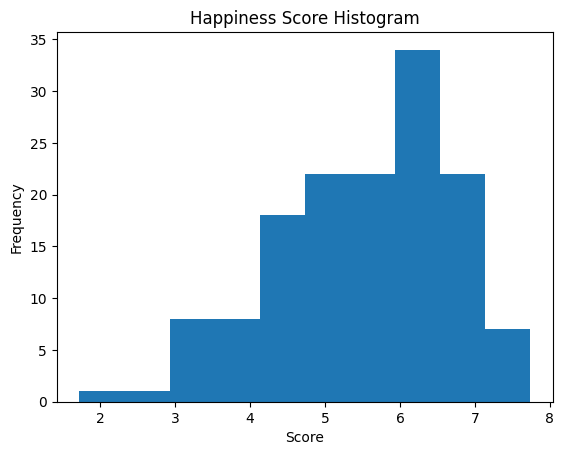

In [23]:
# Histogram: Happiness Score

# Plot histogram using MatplotLib
whr['score'].plot.hist(title="Happiness Score Histogram")
plt.xlabel('Score')
plt.show()

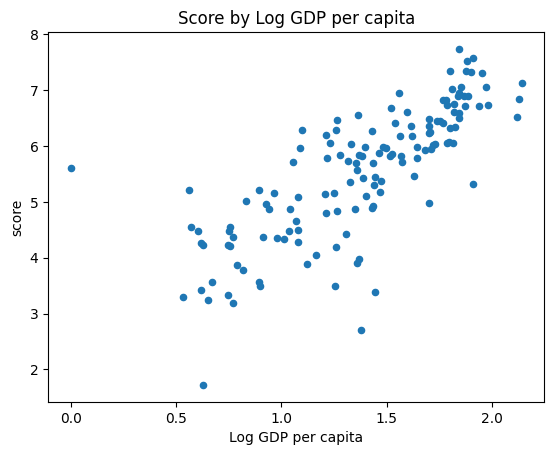

In [24]:
# Scatter plot: Score X Log GDP per capita

# Since we have 3 rows consisting of only score data, we will exclude them
# whr_exclude_na = whr[whr['Log GDP per capita'].notna()]

# Plot scatter plot using MatplotLib
whr.plot.scatter(x='Log GDP per capita', y='score', title='Score by Log GDP per capita', marker='o')
plt.show()



---


**Problem 2**

In [115]:
# Problem 2 - Task 1 - Setup Task - Preparing the South-Asia Dataset:

# Define south asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

south_asian_whr = whr[whr['Country name'].isin(south_asian_countries)]
south_asian_whr.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [116]:
# Write south asian countries into separate csv for future use

south_asian_whr.to_csv('drive/MyDrive/AI/South_Asian_WHR.csv', index=False)

In [117]:
# Problem 2 - Task 2 - Composite Score Ranking
# Create column composite score with given formula

south_asian_whr['Composite Score'] = (0.40 * south_asian_whr['Log GDP per capita']
                                      + 0.3 * south_asian_whr['Social support']
                                      + 0.3 * south_asian_whr['Healthy life expectancy'])
south_asian_whr.head(10)

<ipython-input-117-f63747edfe03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_whr['Composite Score'] = (0.40 * south_asian_whr['Log GDP per capita']


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


In [118]:
# Rank countries based on the composite score in descending order

south_asian_sorted = south_asian_whr.sort_values(by="Composite Score", ascending=False)

south_asian_sorted[['Country name', 'Composite Score']].head(10)

,Country name,Composite Score
127,Sri Lanka,1.0739
92,Nepal,0.8159
125,India,0.7874
107,Pakistan,0.7039
128,Bangladesh,0.6774
142,Afghanistan,0.3238


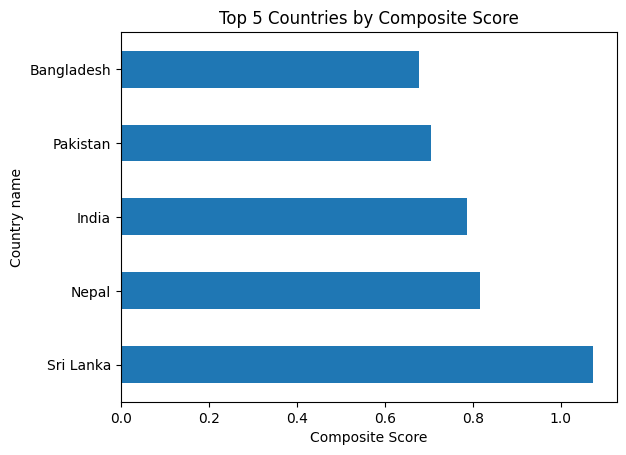

In [120]:
# Visualize top 5 countries using horizontal bar chart showing composite score

south_asian_sorted.head(5).plot(kind='barh',
                        x='Country name',
                        y='Composite Score',
                        legend=None,
                        title='Top 5 Countries by Composite Score')
plt.xlabel('Composite Score')
plt.show()

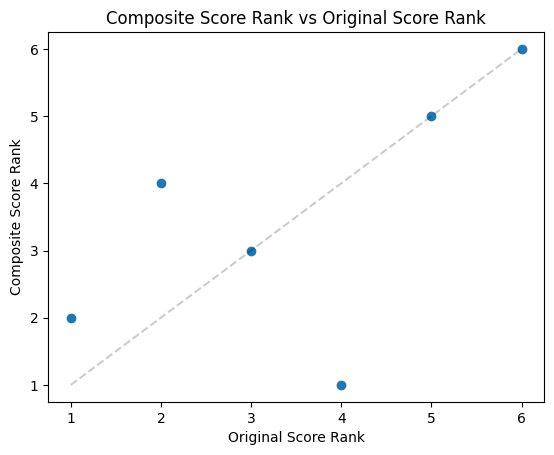

In [121]:
# Visualize whether composite score aligns with original score

# south_asian_sorted['Composite Score'].rank(ascending=False)
# south_asian_sorted['score'].rank(ascending=False)
max_rank = len(south_asian_sorted)
plt.plot(range(1, max_rank + 1),range(1,max_rank + 1), color=(0,0,0,0.2),linestyle='--')
plt.scatter(south_asian_sorted['score'].rank(ascending=False),
            south_asian_sorted['Composite Score'].rank(ascending=False),marker='o')
plt.title('Composite Score Rank vs Original Score Rank')
plt.xlabel('Original Score Rank')
plt.ylabel('Composite Score Rank')
plt.show()

In [167]:
# Problem 2 - Task 3 - Outlier detection

# Find upper and lower bounds for outliers, happiness score:

# Calculate IQR for score column
score_q1 = south_asian_whr['score'].quantile(0.25)
score_q3 = south_asian_whr['score'].quantile(0.75)
score_IQR = score_q3 - score_q1

# Set the upper and lower bounds using 1.5 * IQR
score_upper = score_q3 + (1.5 * score_IQR)
score_lower = score_q1 - (1.5 * score_IQR)

print(f"Threshold values = ({score_lower:.3f}, {score_upper:.3f})")

Threshold values = (2.963, 5.432)


In [169]:
# Find upper and lower bounds for outliers, log GDP per capita:

# Calculate IQR for log GDP per capita
gdp_q1 = south_asian_whr['Log GDP per capita'].quantile(0.25)
gdp_q3 = south_asian_whr['Log GDP per capita'].quantile(0.75)
gdp_IQR = gdp_q3 - gdp_q1

# Calculate IQR for log GDP per capita
gdp_upper = gdp_q3 + 1.5 * gdp_IQR
gdp_lower = gdp_q1 - 1.5 * gdp_IQR

print(f"Threshold values = ({gdp_lower:.3f}, {gdp_upper:.3f})")

Threshold values = (0.745, 1.401)


In [174]:
# Locate outliers

outliers = south_asian_whr.loc[((south_asian_whr['score'] > score_upper) | (south_asian_whr['score'] < score_lower) |
                     (south_asian_whr['Log GDP per capita'] > gdp_upper) | (south_asian_whr['Log GDP per capita'] < gdp_lower))]
outliers

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238
